In [48]:
# instalando o skfuzzy
!pip install -U scikit-fuzzy

In [49]:
# Fazendo os imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import skfuzzy as fuzz
from sklearn import metrics
from sklearn.decomposition import PCA

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
dataset = pd.read_csv(url, header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [50]:
# separando entre features e target
features = dataset.iloc[:, 1:14]
target = dataset.iloc[:, 0]


# setando o número de clusters como 3
n_clusters = 3

In [51]:
# Converte o dataframe para uma matriz de NumPy
data = features.values
X = data.astype(float)

# Normalizando utilizando Z-score
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Converter de volta para dataframe
df_normalized = pd.DataFrame(X)

# Criando uma instancia do modelo PCA com 3 componentes
pca = PCA(n_components=3)

# Ajustando o modelo aos dados
X_pca = pca.fit_transform(X)

# Transformando o modelo de PCA em um dataframe
df_pca = pd.DataFrame(X_pca)

In [52]:
# Fuzzy c-means
# testando melhor valor para "m"
m_values = np.arange(2, 3.55, 0.05)

# Transpor o dataframe para usar no CMeans
df_pca_T = df_pca.T

for m in m_values:
  cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(df_pca_T, n_clusters, m, error=0.005, maxiter=1000)
  print(f"com m = {m:.2f}, temos fpc = {fpc:.3f}")

com m = 2.00, temos fpc = 0.681
com m = 2.05, temos fpc = 0.664
com m = 2.10, temos fpc = 0.648
com m = 2.15, temos fpc = 0.632
com m = 2.20, temos fpc = 0.617
com m = 2.25, temos fpc = 0.603
com m = 2.30, temos fpc = 0.589
com m = 2.35, temos fpc = 0.577
com m = 2.40, temos fpc = 0.565
com m = 2.45, temos fpc = 0.553
com m = 2.50, temos fpc = 0.542
com m = 2.55, temos fpc = 0.532
com m = 2.60, temos fpc = 0.522
com m = 2.65, temos fpc = 0.513
com m = 2.70, temos fpc = 0.505
com m = 2.75, temos fpc = 0.496
com m = 2.80, temos fpc = 0.489
com m = 2.85, temos fpc = 0.482
com m = 2.90, temos fpc = 0.475
com m = 2.95, temos fpc = 0.468
com m = 3.00, temos fpc = 0.462
com m = 3.05, temos fpc = 0.456
com m = 3.10, temos fpc = 0.451
com m = 3.15, temos fpc = 0.446
com m = 3.20, temos fpc = 0.441
com m = 3.25, temos fpc = 0.436
com m = 3.30, temos fpc = 0.432
com m = 3.35, temos fpc = 0.428
com m = 3.40, temos fpc = 0.424
com m = 3.45, temos fpc = 0.420
com m = 3.50, temos fpc = 0.417


Com isso, escolheremos m = 2, por ter dado o maior valor para fpc

In [53]:
# aplicando o CMeans
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(df_pca_T, n_clusters, 2, error=0.005, maxiter=1000)

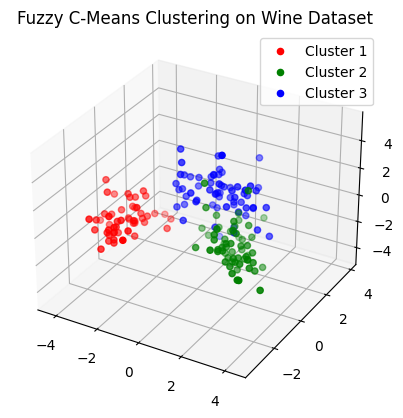

In [54]:
# Plotando
from mpl_toolkits.mplot3d import Axes3D

cluster_membership = np.argmax(u, axis=0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']

for j in range(n_clusters):
    cluster_indices = np.where(cluster_membership == j)[0]
    ax.scatter(df_pca.iloc[cluster_indices, 0], df_pca.iloc[cluster_indices, 1], df_pca.iloc[cluster_indices, 2],
               c=colors[j], label=f'Cluster {j + 1}', marker='o')

ax.legend()
plt.title('Fuzzy C-Means Clustering on Wine Dataset')
plt.show()

In [55]:
# medindo o desempenho pelo coeficiente de silhouette
from sklearn import metrics

silhouette_avg = metrics.silhouette_score(df_pca, cluster_membership)
print("Silhouette cofficient do clustering: " + str(silhouette_avg))

Silhouette cofficient do clustering: 0.4538179544165123
